## EDA for final project - Spotify
### Music Recommender Systems

**Team: Jack Connolly, Andrew Soldini, Nick Kochanek, Chris Jarrett**

Using the Spotify Million Playlist Dataset, exploring attributes of the data looking for potentially useful asepcts/groupings/features

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import keras
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
data_path = 'large_files/'

Note: The code below creating the network takes a long time and the output pickle files are probably too big to upload to Canvas. If you want to take a look at them we'd be happy to share.

In [5]:
song_name_to_uri = {}
uri_to_song_name = {}
network = {}
track_counts = {}

f_start = 0
f_end = 999

# open the first n files, and read them into the network 
for i in range(20) : 
    with open(data_path + '/mpd.slice.{}-{}.json'.format(f_start, f_end)) as f : 
        data = json.load(f)
        
    for playlist in data['playlists'] : 

        for song in playlist['tracks'] : 
            track_name  = song['track_name']
            track_uri = song['track_uri']
            shared_songs = np.array([s['track_uri'] for s in playlist['tracks'] if s['track_uri'] != track_uri])

            if track_name not in track_counts:
                track_counts[track_name] = 0     
            track_counts[track_name] += 1
            
            if track_name not in song_name_to_uri : 
                song_name_to_uri[track_name] = track_uri
            if track_uri not in uri_to_song_name : 
                uri_to_song_name[track_uri] = track_name

            if track_uri not in network : 
                network[track_uri] = np.array(shared_songs)
            else : 
                network[track_uri] = np.append(network[track_uri], np.array(shared_songs))
                
    print ("done loading file", i)             
    f_start += 1000
    f_end += 1000
    

# clean the network (switch to counts rather then multiple edges) 
print("Cleaning up the Network a bit")
for uri in network : 
    unique, counts = np.unique(network[uri], return_counts=True)
    network[uri] = {'songs' : unique, 'counts': counts / np.sum(counts)}

# Save the network 
with open(data_path + 'basic_network_20.pickle', 'wb') as f:
    pickle.dump(network, f)

with open(data_path + 'songs_to_uri.pickle', 'wb') as f:
    pickle.dump(song_name_to_uri, f)

with open(data_path + 'uri_to_song', 'wb') as f:
    pickle.dump(uri_to_song_name, f)

done loading file 0
done loading file 1
done loading file 2
done loading file 3
done loading file 4
done loading file 5
done loading file 6
done loading file 7
done loading file 8


KeyboardInterrupt: 

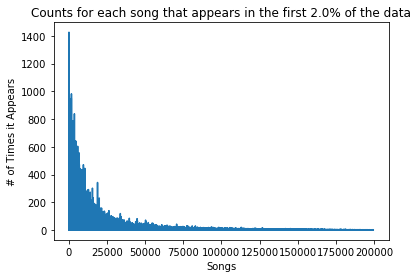

In [4]:
names = list(track_counts.keys())
counts = list(track_counts.values())

num_files = 20
percent_data = (num_files / 1000) * 100

plt.plot(range(len(names)), counts)
plt.xlabel('Songs')
plt.ylabel('# of Times it Appears')
plt.title(f'Counts for each song that appears in the first {percent_data}% of the data')
plt.show()